# Variational inference

In [1]:
# Import packages
import numpy as np
import torch
import plotly.graph_objects as go
from nn import *

Assume the target is normally distributed around some mean function of the input, given by a neural network, with some variance.

\begin{equation*}
p(y | x, \theta) := \mathcal{N}(\mu = NN(x, \theta), K(y, y') = \mathcal{I})
\end{equation*}

Put a prior on the parameters of the network

\begin{equation*}
p(\theta) := \mathcal{N}(\mu = 0, \sigma^2 = 100 \mathcal{I})
\end{equation*}

and try to infer their posterior.

As variational distribution, we will be simply using a single Gaussian:

\begin{equation*}
q_\phi(\theta) := \mathcal{N}(\theta; \mu_q, \sigma_q^2)\,,
\end{equation*}

where $\phi := (\mu_q,\sigma_q)$ are the variational parameters, which are randomly initialised.

<b>Exercise:</b> In this simple problem, we can directly compute the KL divergence between the target distribution
 (i.e., the mixture of Gaussians) and the variational distribution. As a first exercise, implement the sample-based
 KL divergence approximation:

\begin{equation*}
\mathrm{KL}(q_\phi||p) := \mathbb{E}_{\theta\sim q_\phi}\left[\log\frac{q_\phi(\theta)}{p(\theta)}\right]
\approx \frac{1}{S}\sum_{i=1}^S \log\frac{q_\phi(\theta^{(i)})}{p(\theta^{(i)})}\,,
\end{equation*}

where $\{\theta^{(i)}\}_{i=1}^S\overset{i.i.d.}{\sim} q_\phi$.

That was surprisingly easy.  Proper initialisation still helps a lot I think.  But yeah, actually seems kind of easier than gradient descent..?

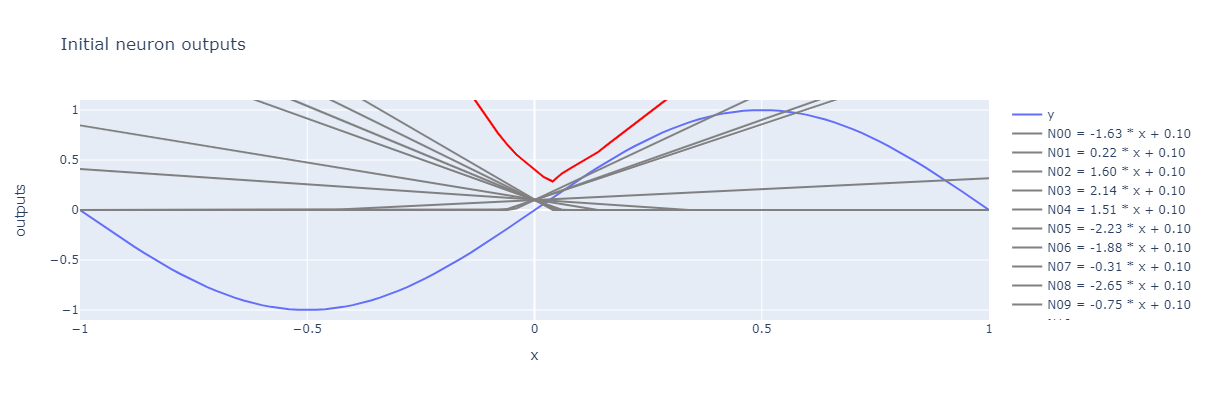

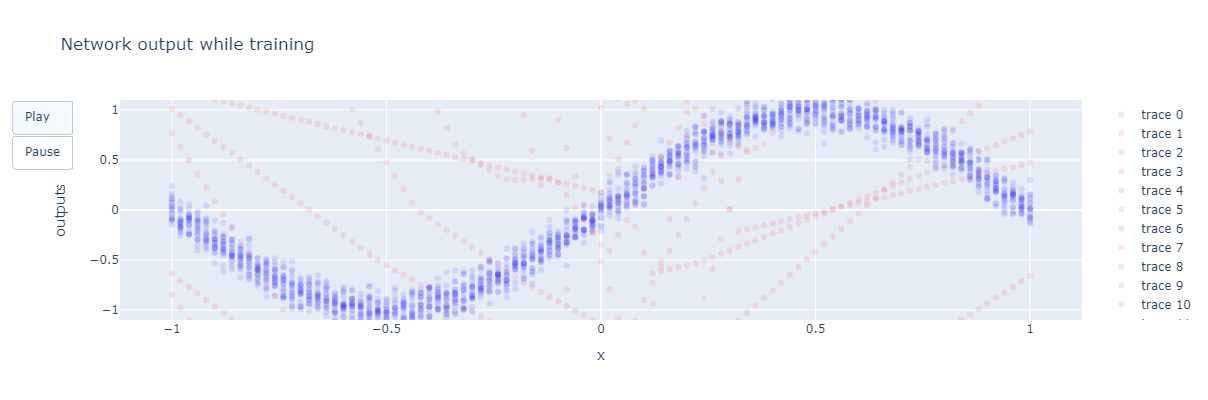

In [5]:
# Make data
r = 1
x = torch.linspace(-r, r, 101).reshape(101, 1)

# Target functions, from easy to hard
# y = torch.maximum(2 * x, torch.zeros_like(x))
# y = x**3
# y = np.exp(x)
y = np.sin(np.pi * x)

# Set number of neurons in hidden layer
n_hidden=10

# Initialise variational parameters
q_mean = init_par(n_hidden, x, y)
log_q_sd = torch.log(torch.rand([3 * n_hidden + 1]))
log_q_sd.requires_grad = True

# Run variational inference
var_inf(
    q_mean, log_q_sd, x, y, n_hidden, n_iterations = 1000, plot_every = 100, 
    n_samples = 20
)